In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r'C:\Users\ccdeb\Documents\CS\3A\APPRAUTO\TP_soudure_new\tp_appr_auto\code\CD1_target_created.csv')

col_test = ['Yield strength (MPa)','Ultimate tensile strength (MPa)', 'Elongation (%)',
            'Reduction of Area (%)','Charpy impact toughness (J)']


In [4]:
df

,C concentration (weight%),Si concentration (weight%),Mn concentration (weight%),S concentration (weight%),P concentration (weight%),V concentration (weight%),O concentration (ppm/weight),Ti concentration (ppm/weight),N concentration (ppm/weight),Al concentration (ppm/weight),...,Type of weld_GMAA,Type of weld_GTAA,Type of weld_MMA,Type of weld_NGGMA,Type of weld_NGSAW,Type of weld_SA,Type of weld_SAA,Type of weld_ShMA,Type of weld_TSA,y
0,-1.794624,-0.241903,-1.474090,-0.150353,-0.062002,1.542981e-17,-1.143271e-16,0.0,0.000000,8.694071e-17,...,False,False,True,False,False,False,False,False,False,0
1,-1.794624,-0.241903,-1.474090,-0.150353,-0.062002,1.542981e-17,-1.143271e-16,0.0,0.000000,8.694071e-17,...,False,False,True,False,False,False,False,False,False,0
2,-1.794624,-0.157085,-0.467487,-0.234530,0.034196,1.542981e-17,-1.143271e-16,0.0,0.000000,8.694071e-17,...,False,False,True,False,False,False,False,False,False,0
3,-1.794624,-0.157085,-0.467487,-0.234530,0.034196,1.542981e-17,-1.143271e-16,0.0,0.000000,8.694071e-17,...,False,False,True,False,False,False,False,False,False,0
4,-1.474696,0.182188,0.592095,-0.234530,0.034196,1.542981e-17,-1.143271e-16,0.0,0.000000,8.694071e-17,...,False,False,True,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,1.084728,0.267007,-0.732382,-0.150353,0.130393,2.066602e-01,-4.697737e-01,0.0,3.215642,8.694071e-17,...,False,False,False,False,False,True,False,False,False,1
1459,1.084728,0.182188,-0.811851,-0.150353,0.130393,1.662291e-01,-4.968866e-01,0.0,3.025960,8.694071e-17,...,False,False,False,False,False,True,False,False,False,1
1460,0.536280,0.267007,-0.864830,-0.150353,0.178492,1.864446e-01,-2.077631e-03,0.0,2.983809,8.694071e-17,...,False,False,False,False,False,True,False,False,False,1
1461,0.627688,0.097370,-0.838341,-0.150353,0.130393,-1.572193e-01,-3.070968e-01,0.0,-0.156478,8.694071e-17,...,False,False,False,False,False,True,False,False,False,1


In [5]:
bool = df.select_dtypes(include=['bool'])
Dmap = {True:1,False:0}
dfacp = df.copy()
for c in bool:
    dfacp[c] = dfacp[c].map(Dmap)
dfacpx = dfacp.drop(columns='y',axis=1) #Il ne faudrait pas appliquer l'acp sur la cible
for k in dfacpx.columns:
    if dfacpx[k].nunique()==2:
        dfacpx[k] = (dfacp[k]-dfacp[k].mean())/dfacp[k].std()

In [6]:
acp = PCA()
acp.fit(dfacpx)

print(acp.explained_variance_ratio_ * 100)


[16.62804063 10.05828459  8.14351619  6.53261355  5.20650774  4.62671182
  4.55691522  4.34428361  4.28990451  4.12898012  3.97695647  3.82340929
  3.34571951  3.15647345  2.71593055  2.51506736  2.25724021  1.99832678
  1.95308072  1.68737435  1.35809059  1.1936519   0.74640103  0.29927708
  0.17614441  0.15868788  0.12241045]


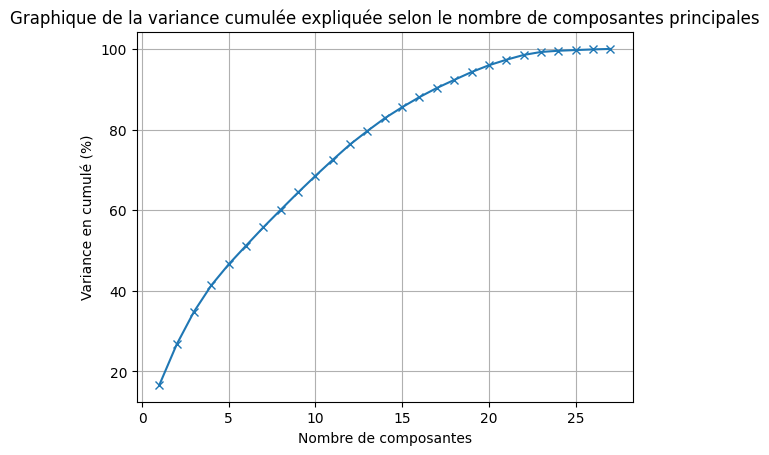

In [7]:
# variance expliquée cumulée
varcum = acp.explained_variance_ratio_.cumsum()

# Graphique pour prise de décision 
plt.plot(range(1, len(varcum) + 1), varcum * 100, marker='x')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance en cumulé (%)')
plt.title('Graphique de la variance cumulée expliquée selon le nombre de composantes principales')
plt.grid(True)
plt.show()

In [8]:
acp = PCA(n_components=15)
X_acp = acp.fit_transform(dfacpx)

var_tot = sum(acp.explained_variance_ratio_) * 100
print("Variance totale :",var_tot,'%')

Variance totale : 85.53424724694003 %


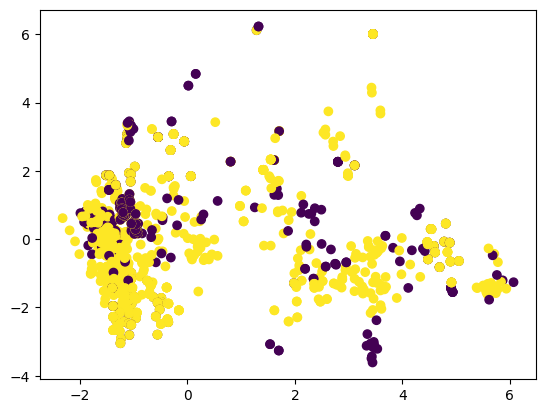

In [9]:
X = pd.DataFrame(X_acp)
y = df['y']
plt.scatter(X[0],X[1],c=y)

In [16]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"X_train shape {X_train.shape}")
print(f"Y_train shape {y_train.shape}")
print(f"X_test shape {X_test.shape}")
print(f"Y_test shape {y_test.shape}")

X_train shape (1024, 15)
Y_train shape (1024,)
X_test shape (439, 15)
Y_test shape (439,)


In [17]:
#svm_model = SVC(kernel='linear')  # Noyau choisi : 'linear', peut être changé en 'poly', 'rbf', 'sigmoid', etc.
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)  # Entraînement du modèle

# Étape 3 : Faire des prédictions sur le jeu de test
y_pred = xgb_model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print("Matrice de Corrélation de Matthews (MCC) : ", mcc)

Matrice de Corrélation de Matthews (MCC) :  0.17263840705280661


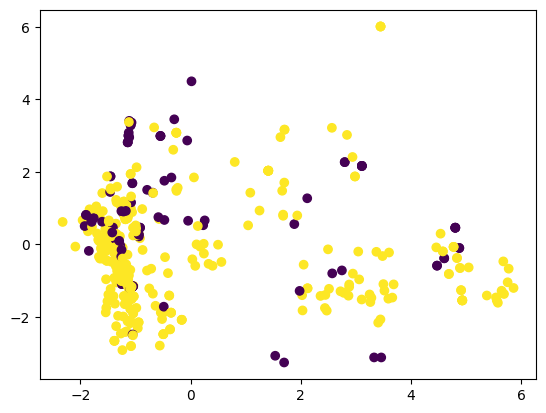

In [21]:
plt.scatter(X_test[0],X_test[1],c=y_pred)

In [23]:
pd.DataFrame({'y':y_pred})['y'].value_counts()

y
1    334
0    105
Name: count, dtype: int64

In [24]:
pd.DataFrame({'y':y_test})['y'].value_counts()

y
1    323
0    116
Name: count, dtype: int64

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve, matthews_corrcoef, accuracy_score, classification_report, confusion_matrix

y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

In [26]:
auc

0.710112629443792